In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


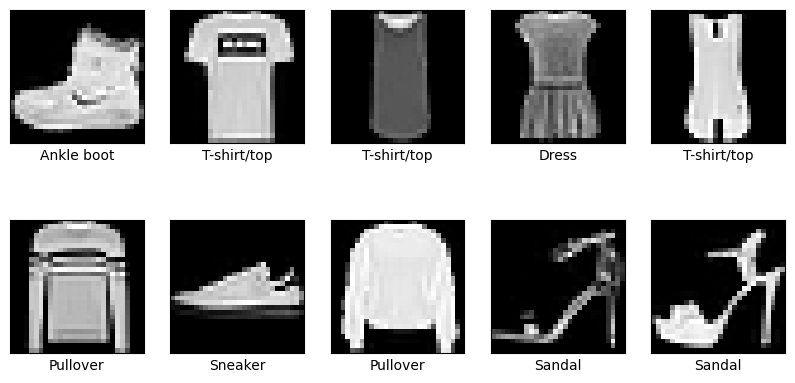

In [3]:
print(f"Training Data Shape: {x_train.shape}")  # (60000, 28, 28)
print(f"Testing Data Shape: {x_test.shape}")  # (10000, 28, 28)

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2), 

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),  

    keras.layers.Flatten(),  

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

C:\Users\91766\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.7762 - loss: 0.6157 - val_accuracy: 0.8647 - val_loss: 0.3798
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8837 - loss: 0.3146 - val_accuracy: 0.8875 - val_loss: 0.3095
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9023 - loss: 0.2686 - val_accuracy: 0.8937 - val_loss: 0.2866
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9143 - loss: 0.2316 - val_accuracy: 0.9039 - val_loss: 0.2639
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9242 - loss: 0.2053 - val_accuracy: 0.9074 - val_loss: 0.2596
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9349 - loss: 0.1744 - val_accuracy: 0.9114 - val_loss: 0.2533
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9426 - loss: 0.1551 - val_accuracy: 0.9169 - val_loss: 0.2477
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9491 -

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9099 - loss: 0.6801

Test Accuracy: 0.9097


In [13]:
predictions = model.predict(x_test)
y_pred = predictions.argmax(axis=-1)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.83      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



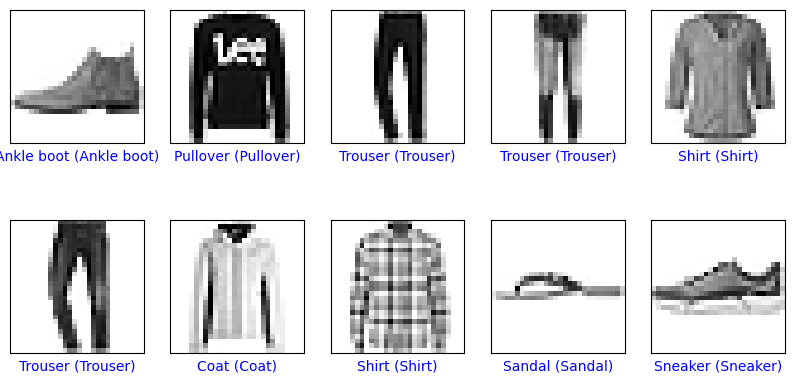

In [14]:
# Function to visualize predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Display 10 predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()
